In [1]:
from luminis_mc import ResultsLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [7]:
def plot_farfield_disk(Z_th_ph, meta, ax=None, title="", r_mapping="sin", force_nphi=360):
    """
    Z_th_ph: (N_theta, N_phi)
    meta: dict con N_theta, N_phi, theta_max, phi_max
    r_mapping: "sin" (recomendado) o "theta" (aprox ángulo pequeño)
    force_nphi: si N_phi==1, repite esa columna para dibujar un disco completo.
    """
    if ax is None:
        ax = plt.gca()

    Z = np.asarray(Z_th_ph)
    Nth = int(meta["N_theta"])
    Nph = int(meta["N_phi"])
    theta_max = float(meta["theta_max"])
    phi_max = float(meta["phi_max"])

    # sanity
    if Z.shape[0] != Nth:
        # si viene transpuesto
        if Z.shape[1] == Nth:
            Z = Z.T
        else:
            raise ValueError(f"Shape raro: Z{Z.shape} pero N_theta={Nth}, N_phi={Nph}")

    # Si N_phi == 1, no hay 2D real. Hacemos disco por simetría: tile en phi.
    if Nph == 1:
        Nph_plot = int(force_nphi)
        Z = np.repeat(Z, Nph_plot, axis=1)
        Nph = Nph_plot
        phi_max = 2*np.pi

    # edges (IMPORTANTÍSIMO para pcolormesh)
    theta_edges = np.linspace(0.0, theta_max, Nth + 1)
    phi_edges   = np.linspace(0.0, phi_max, Nph + 1)  # edges sí incluyen endpoint

    if r_mapping == "sin":
        r_edges = np.sin(theta_edges)
    elif r_mapping == "theta":
        r_edges = theta_edges
    else:
        raise ValueError("r_mapping debe ser 'sin' o 'theta'")

    # Malla: phi primero (filas), theta segundo (columnas)
    PHI, R = np.meshgrid(phi_edges, r_edges, indexing="ij")  # (Nph+1, Nth+1)
    X = R * np.cos(PHI)
    Y = R * np.sin(PHI)

    # Z para pcolormesh debe ser (Nph, Nth)
    Zp = Z.T  # Z era (Nth, Nph) -> (Nph, Nth)

    pcm = ax.pcolormesh(X, Y, Zp, shading="auto")
    ax.set_aspect("equal")
    ax.axis("off")
    ax.set_title(title, fontsize=10)
    return pcm

In [31]:
base_dir = "/Users/niaggar/Documents/Thesis/Progress/23Feb26/2026-02-20_13-32-51_sim_cbs"
data = ResultsLoader(base_dir)

meta_sensor = data.sensor_meta("farfield_cbs")

S0_coh_data = data.derived("farfield_cbs/S0_coh")
S1_coh_data = data.derived("farfield_cbs/S1_coh")
S2_coh_data = data.derived("farfield_cbs/S2_coh")
S3_coh_data = data.derived("farfield_cbs/S3_coh")
S0_incoh_data = data.derived("farfield_cbs/S0_inc")
S1_incoh_data = data.derived("farfield_cbs/S1_inc")
S2_incoh_data = data.derived("farfield_cbs/S2_inc")
S3_incoh_data = data.derived("farfield_cbs/S3_inc")
theta_data = data.derived("farfield_cbs/theta")
phi_data = data.derived("farfield_cbs/phi")


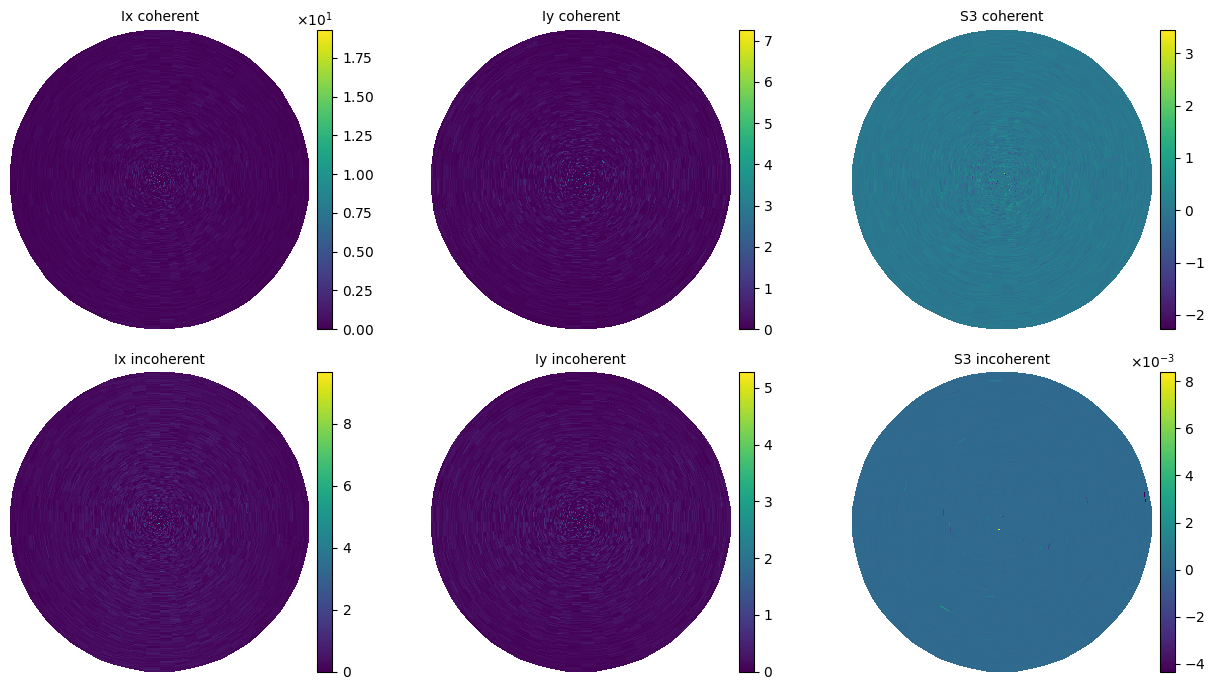

<Figure size 640x480 with 0 Axes>

In [32]:
Ix_c = (S0_coh_data + S1_coh_data) / 2
Iy_c = (S0_coh_data - S1_coh_data) / 2
Ix_i = (S0_incoh_data + S1_incoh_data) / 2
Iy_i = (S0_incoh_data - S1_incoh_data) / 2

fig, axes = plt.subplots(2, 3, figsize=(13, 7))

panels = [
    ("Ix coherent", Ix_c), ("Iy coherent", Iy_c), ("S3 coherent", S3_coh_data),
    ("Ix incoherent", Ix_i), ("Iy incoherent", Iy_i), ("S3 incoherent", S3_incoh_data),
]

for ax, (title, Z) in zip(axes.ravel(), panels):
    pcm = plot_farfield_disk(Z, meta_sensor, ax=ax, title=title, r_mapping="sin", force_nphi=360)
    cb = fig.colorbar(pcm, ax=ax, fraction=0.046, pad=0.02)
    fmt = ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))  # fuerza ×10^n
    cb.formatter = fmt
    cb.update_ticks()

plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()

In [40]:
print(data.h5['sensors/statistics/data'].keys())

events_histogram = data.sensor_data('statistics', 'events_histogram')
depth_histogram = data.sensor_data('statistics', 'depth_histogram')
theta_histogram = data.sensor_data('statistics', 'theta_histogram')
phi_histogram = data.sensor_data('statistics', 'phi_histogram')

meta_hist = data.sensor_meta('statistics')
print(theta_histogram)

print(meta_hist['max_theta'])


<KeysViewHDF5 ['depth_histogram', 'events_histogram', 'phi_histogram', 'theta_histogram']>
[  27   87  151  234  267  337  441  469  580  600  646  723  803  839
  925  946 1031 1033 1059 1157 1151 1280 1307 1373 1391 1448 1383 1465
 1423 1552 1600 1587 1586 1637 1736 1692 1588 1721 1700 1713 1609 1696
 1736 1656 1719 1683 1714 1689 1616 1640 1590 1630 1554 1559 1560 1502
 1435 1424 1394 1404 1352 1273 1278 1239 1117 1158 1081  957  895  947
  849  856  828  757  680  649  578  529  522  480  410  323  314  260
  207  207  132   94   51   15    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  

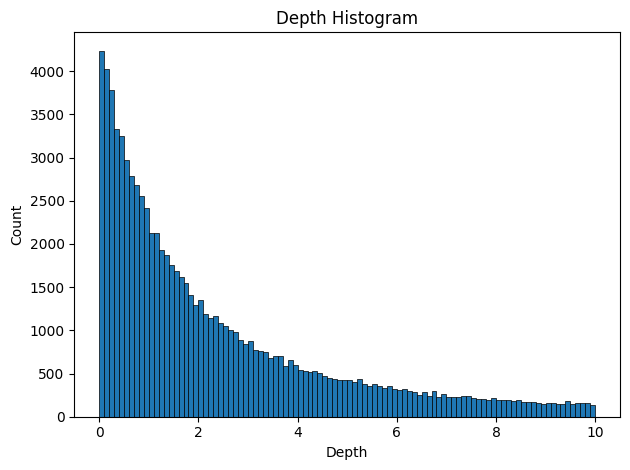

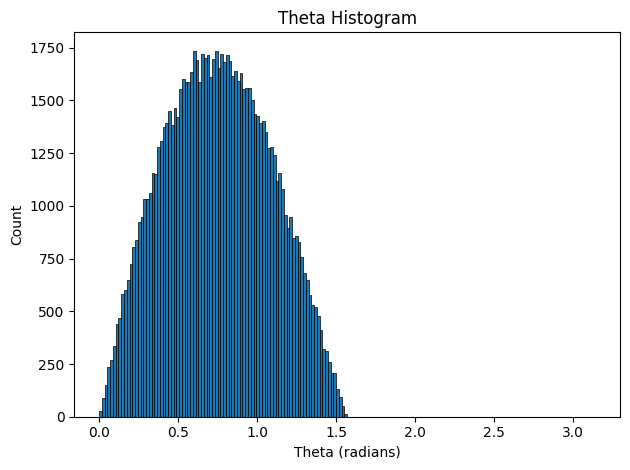

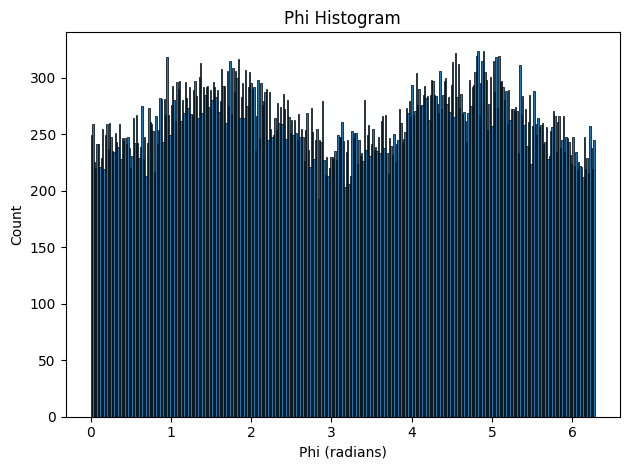

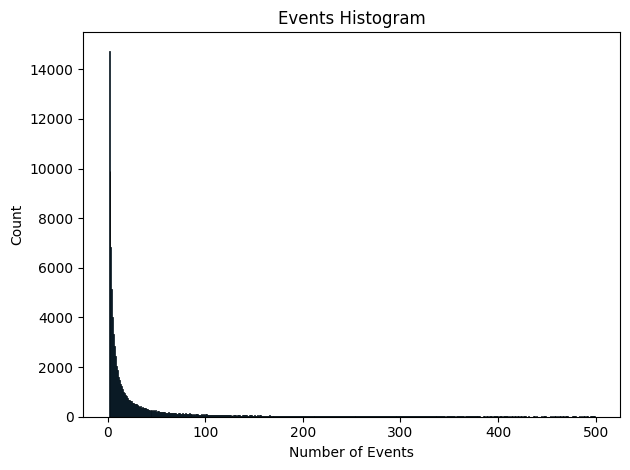

In [ ]:
def plot_histogram(hist, edges, ax=None, title="", xlabel="", ylabel="Probability", x_max=None):
    if ax is None:
        ax = plt.gca()
    widths = np.diff(edges)
    total = np.sum(hist)
    if total > 0:
        prob = hist / total
    else:
        prob = hist
    ax.bar(edges[:-1], prob, width=widths, align='edge', edgecolor='black', linewidth=0.5)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if x_max is not None:
        ax.set_xlim(0, x_max)
    
    plt.tight_layout()
    plt.show()


ddepth_edges = np.linspace(0, meta_hist['max_depth'], meta_hist['n_bins_depth'] + 1)
plot_histogram(depth_histogram, ddepth_edges, title="Depth Histogram", xlabel="Depth")

theta_edges = np.linspace(0, meta_hist['max_theta'], meta_hist['n_bins_theta'] + 1)
plot_histogram(theta_histogram, theta_edges, title="Theta Histogram", xlabel="Theta (radians)")

phi_edges = np.linspace(0, meta_hist['max_phi'], meta_hist['n_bins_phi'] + 1)
plot_histogram(phi_histogram, phi_edges, title="Phi Histogram", xlabel="Phi (radians)")

events_edges = np.linspace(0, meta_hist['max_events'], meta_hist['max_events'] + 1)
plot_histogram(events_histogram, events_edges, title="Events Histogram", xlabel="Number of Events")

